In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arccos, dot
from numpy.linalg import norm

## 1.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

In [36]:
def angle_between (v1,v2):
    
    theta = arccos(dot(v1, v2.T)/(norm(v1)*norm(v2)))
    
    return theta


a = np.array([[9, 3, 5]])
b = np.array([[2, 9, 2]])

angle_between(a,b)

array([[0.99601745]])

## 2.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [16]:
def row_dot (A, r1, r2):
    
    x = np.dot(A[r1,:],A[r2,:])
    return x

a1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

row_dot(a1,0,2)

50

## 3.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

In [78]:
def matrix_division (m1, m2):
    m = np.round((m1/m2),2)
    return m
    
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
y = np.array([[3,2,4],[6,7,1],[2,1,9]])

matrix_division(x,y)

# / division gives you decimals values where as // division (floor division) only gives you value before decimal point.

array([[0.33, 1.  , 0.75],
       [0.67, 0.71, 6.  ],
       [3.5 , 8.  , 1.  ]])

## 4.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol|π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.

In [62]:
def is_orthogonal (v1, v2, tol=0.000001):
    
    theta = arccos(dot(v1.T, v2)/(norm(v1)*norm(v2)))
    
    for i in theta:
        if tol > abs(np.pi/2 - (theta)):
            return 1
        else:
            return 0
    
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

is_orthogonal(a,b,0.01)

1

In [63]:
is_orthogonal(a,b, 0.001)

0

In [31]:
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])

is_orthogonal(a,b, 0.01)

0

In [32]:
a = np.array([[1], [1]])
b = np.array([[-1], [1]])

is_orthogonal(a,b, 1e-10)

1

## 5.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

In [71]:
class vector_calculator:
    
    def _init_(self):
        
        self.v1 = v1
        self.v2 = v2
        self.tol = 0.00001
       
   

    def angle_between (self, v1,v2):
    
    
        theta = arccos(dot(v1, v2.T)/(norm(v1)*norm(v2)))
    
        return theta
    
    
    def is_orthogonal (self,v1,v2,tol=0.0001):
        
    
        theta = arccos(dot(v1.T, v2)/(norm(v1)*norm(v2)))
    
        for i in theta:
            if tol > abs(np.pi/2 - (theta)):
                return 1
            else:
                return 0
        
        
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])        

x = vector_calculator()

print(x.angle_between(a,b))
print(x.is_orthogonal(a,b,0.01))  
print(x.is_orthogonal(a,b,0.001))

[[1.56979633e+00 1.41421297e-03]
 [1.57079533e+00 1.56979633e+00]]
1
0


In [72]:
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])

x = vector_calculator()

print(x.angle_between(a,b))
print(x.is_orthogonal(a,b,0.01)) 

[[0.78539866 0.78539866]
 [1.57008922 1.57008922]]
0


In [73]:
a = np.array([[1], [1]])
b = np.array([[-1], [1]])

x = vector_calculator()

print(x.angle_between(a,b))
print(x.is_orthogonal(a,b,1e-10)) 

[[2.0943951  1.04719755]
 [2.0943951  1.04719755]]
1


## 6.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

In [ ]:
#Principal Component Analysis (PCA) in Python using Scikit-Learn Principal component analysis is a technique used to reduce
#the dimensionality of a data set. PCA is typically employed prior to implementing a machine learning algorithm 
#because it minimizes the number of variables used to explain the maximum amount of variance for a given data set.

In [79]:
from sklearn.datasets import load_breast_cancer

In [80]:
breast = load_breast_cancer()

breast_data = breast.data
breast_labels = breast.target

In [87]:
labels = np.reshape(breast_labels,(569,1))

In [88]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [93]:
breast_dataset = pd.DataFrame(final_breast_data)

In [94]:
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [95]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [96]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [97]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [98]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [99]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [100]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [101]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)

In [102]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principal_breast_Df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439315,-3.576817,2.459485
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562732
567,10.374794,1.672010,-1.877027
568,-5.475243,-0.670636,1.490437


In [104]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


<Figure size 432x288 with 0 Axes>

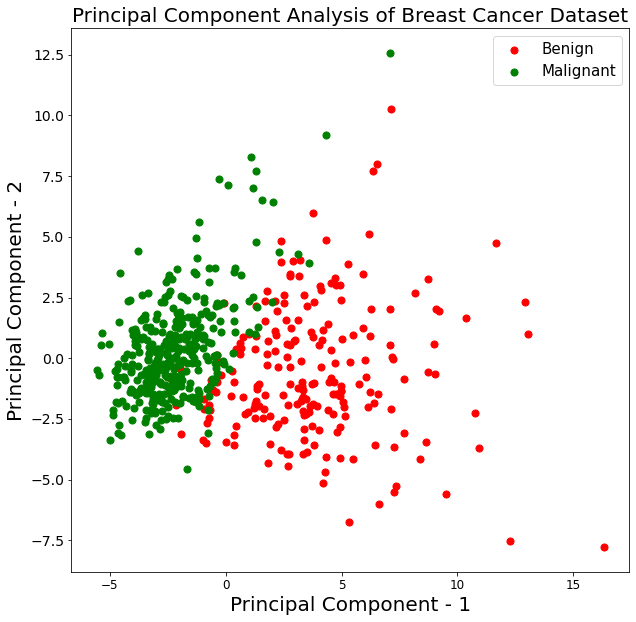

In [110]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


# component 1 vs component 2 graph

<Figure size 432x288 with 0 Axes>

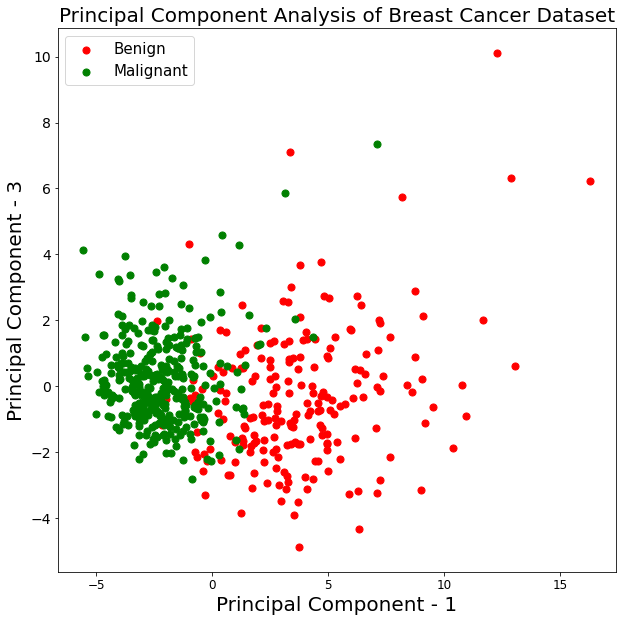

In [112]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# 
# component 1 vs component 3 graph

<Figure size 432x288 with 0 Axes>

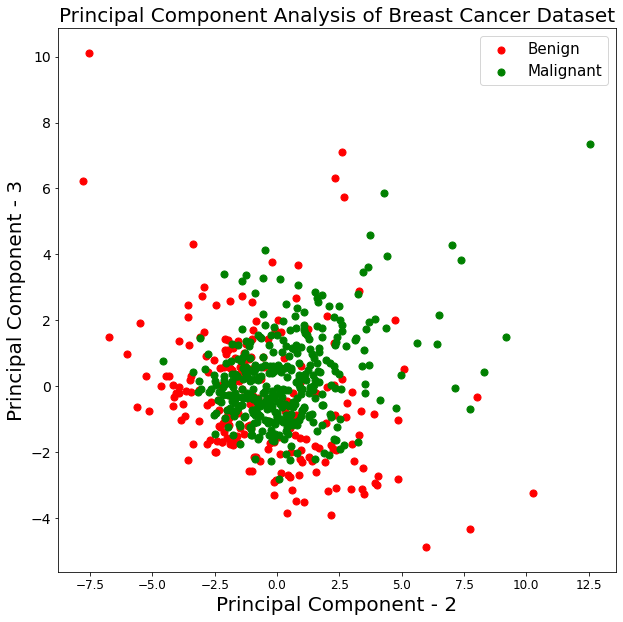

In [113]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 2']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


# component 2 vs component 3 graph

In [114]:
from sklearn.decomposition import PCA
pca_breast = PCA(0.9)
principalComponents_breast = pca_breast.fit_transform(x)

In [116]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['pc 1', 'pc 2','pc 3','pc 4','pc 5','pc 6','pc 7'])

principal_breast_Df.tail()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082
568,-5.475243,-0.670637,1.490443,-2.299157,-0.184703,1.617837,1.698952


KeyError: 'principal component 6'

<Figure size 432x288 with 0 Axes>

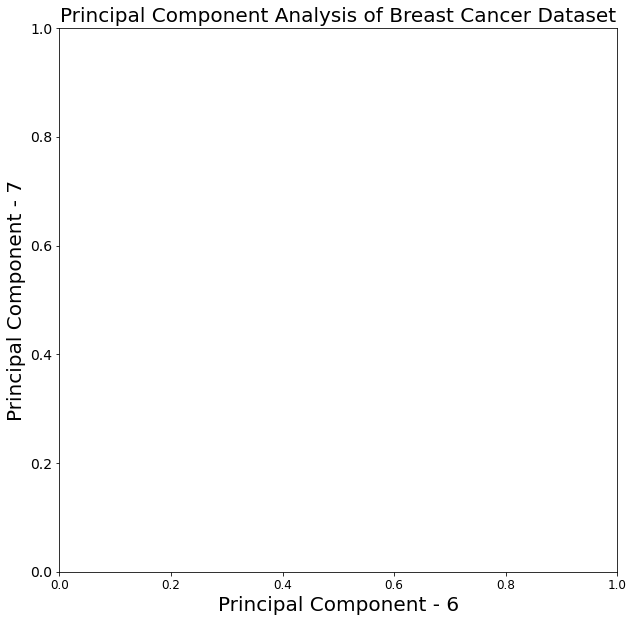

In [117]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 6',fontsize=20)
plt.ylabel('Principal Component - 7',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 6']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 7'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})